<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Training_ALIGNN_model_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents

1. Installing [ALIGNN](https://github.com/usnistgov/alignn)
2. Example training for regression on 50 materials,
3. Using already trained models to make fast predictions
4. Training [JARVIS-DFT](https://jarvis.nist.gov/jarvisdft) 2D exfoliation energy model 
5. Training [QM9](http://quantum-machine.org/datasets/) U0 model

In [1]:
!pip install alignn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 17.7 MB/s 
     |████████████████████████████████| 11.2 MB 43.1 MB/s 
     |████████████████████████████████| 41 kB 156 kB/s 
     |████████████████████████████████| 4.9 MB 34.4 MB/s 
     |████████████████████████████████| 263 kB 27.1 MB/s 
     |████████████████████████████████| 2.2 MB 3.6 MB/s 
     |████████████████████████████████| 967 kB 10.6 MB/s 
     |████████████████████████████████| 61 kB 210 kB/s 
     |████████████████████████████████| 67 kB 3.0 MB/s 
     |████████████████████████████████| 291 kB 20.3 MB/s 
     |████████████████████████████████| 66 kB 1.5 MB/s 
     |████████████████████████████████| 514 kB 10.8 MB/s 
     |████████████████████████████████| 965 kB 13.4 MB/s 
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsi

In [ ]:
import os
!pwd
os.chdir('/content')
# Clone ALIGNN repo to get example folder
if not os.path.exists('alignn'):
  !git clone https://github.com/usnistgov/alignn.git

os.chdir('alignn')
# Install using setup.py in case pip didn't work
# !python setup.py develop

#!pip install dgl-cu111 # Colab has cuda 11.1

/content
Cloning into 'alignn'...
remote: Enumerating objects: 3179, done.
remote: Counting objects: 100% (773/773), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 3179 (delta 621), reused 631 (delta 557), pack-reused 2406
Receiving objects: 100% (3179/3179), 29.97 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (1797/1797), done.


Example folder with id_prop.csv and 'POSCAR files.'

In [ ]:
!ls "alignn/examples/sample_data"

config_example.json	  POSCAR-JVASP-64045.vasp  POSCAR-JVASP-86097.vasp
id_prop.csv		  POSCAR-JVASP-64240.vasp  POSCAR-JVASP-86205.vasp
POSCAR-JVASP-107772.vasp  POSCAR-JVASP-64377.vasp  POSCAR-JVASP-86436.vasp
POSCAR-JVASP-10.vasp	  POSCAR-JVASP-64584.vasp  POSCAR-JVASP-86726.vasp
POSCAR-JVASP-13526.vasp   POSCAR-JVASP-64664.vasp  POSCAR-JVASP-86968.vasp
POSCAR-JVASP-1372.vasp	  POSCAR-JVASP-64719.vasp  POSCAR-JVASP-89025.vasp
POSCAR-JVASP-14014.vasp   POSCAR-JVASP-64906.vasp  POSCAR-JVASP-89265.vasp
POSCAR-JVASP-14441.vasp   POSCAR-JVASP-65062.vasp  POSCAR-JVASP-90228.vasp
POSCAR-JVASP-14873.vasp   POSCAR-JVASP-65101.vasp  POSCAR-JVASP-90532.vasp
POSCAR-JVASP-15345.vasp   POSCAR-JVASP-655.vasp    POSCAR-JVASP-90856.vasp
POSCAR-JVASP-1996.vasp	  POSCAR-JVASP-676.vasp    POSCAR-JVASP-97378.vasp
POSCAR-JVASP-21210.vasp   POSCAR-JVASP-76308.vasp  POSCAR-JVASP-97499.vasp
POSCAR-JVASP-22556.vasp   POSCAR-JVASP-76309.vasp  POSCAR-JVASP-97570.vasp
POSCAR-JVASP-27901.vasp   POSCAR-JVASP-76312.

# 50 materials and their bandgap data generated with the script [generate_sample_data_reg.py](https://github.com/usnistgov/alignn/blob/main/alignn/examples/sample_data/scripts/generate_sample_data_reg.py)

# Train a model for 3 epochs and batch size of 2. Other parameters are provided in `config_example.json` file.

Command line train_folder.py is used below.

In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "alignn/examples/sample_data" --epochs 3 --batch_size 2 --config "alignn/examples/sample_data/config_example.json" --output_dir=temp
t2=time.time()
print ('Time in s',t2-t1)

DGL backend not selected or invalid.  Assuming PyTorch for now.
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
MAX val: 6.149
MIN val: 0.0
MAD: 1.0520696
Baseline MAE: 0.7102749999999998
 data df                                                 atoms  ... target
0   {'lattice_mat': [[-0.0, 4.517300851474054, 4.5...  ...  0.000
1   {'lattice_mat': [[7.709535704177289, 2.46207e-...  ...  0.000
2   {'lattice_mat': [[4.191262576674699, 0.0, -0.0...  ...  0.016
3   {'lattice_mat': [[-0.0, 5.040771484524319, 5.0...  ...  0.000
4   {'lattice_mat': [[1.6712283e-08, -2.5080296697...  ...  6.149
5   {'lattice_mat': [[3.93712543178282, 0.0, 2.273...  ...  3.851
6   {'lattice_mat': [[4.927781968323723, -0.0, 0.0...  ...  0.000
7   {'lattice_mat': [[5.157077730332642, 0.0020004...  ...  4.030
8   {'lattice_mat': [[9.067075684180468, -0.0, 0.0...  .

In [ ]:
!ls

alignn	LICENSE.rst  pyproject.toml  README.md	setup.py  temp


The model produces *.pt files which are the trained models.

In [ ]:
!ls temp

checkpoint_2.pt		 mad
checkpoint_3.pt		 prediction_results_test_set.csv
config.json		 prediction_results_train_set.csv
history_train.json	 test_data_data_range
history_val.json	 train_data_data_range
ids_train_val_test.json  val_data_data_range


We can load a trained model as the following:

In [ ]:
from alignn.models.alignn import ALIGNN, ALIGNNConfig
import torch
output_features =  1
filename = 'temp/checkpoint_3.pt'
device = "cpu"
if torch.cuda.is_available():
    device = torch.device("cuda")
model = ALIGNN(ALIGNNConfig(name="alignn", output_features=output_features))
model.load_state_dict(torch.load(filename, map_location=device)["model"])
model.eval()

ALIGNN(
  (atom_embedding): MLPLayer(
    (layer): Sequential(
      (0): Linear(in_features=92, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU()
    )
  )
  (edge_embedding): Sequential(
    (0): RBFExpansion()
    (1): MLPLayer(
      (layer): Sequential(
        (0): Linear(in_features=80, out_features=64, bias=True)
        (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
      )
    )
    (2): MLPLayer(
      (layer): Sequential(
        (0): Linear(in_features=64, out_features=256, bias=True)
        (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
      )
    )
  )
  (angle_embedding): Sequential(
    (0): RBFExpansion()
    (1): MLPLayer(
      (layer): Sequential(
        (0): Linear(in_features=40, out_features=64, bias=True)
        (1): BatchNorm1d(64, eps=1e-05, momentum=0.

Now, we can build graph for a given structure and make a prediction as follows:

In [ ]:
from jarvis.core.atoms import Atoms
from alignn.graphs import Graph
cutoff = 8.0
max_neighbors = 12
atoms = Atoms.from_poscar('alignn/examples/sample_data/POSCAR-JVASP-10.vasp')
g, lg = Graph.atom_dgl_multigraph(
    atoms, cutoff=float(cutoff), max_neighbors=max_neighbors,
)
out_data = (
    model([g.to(device), lg.to(device)])
    .detach()
    .cpu()
    .numpy()
    .flatten()
    .tolist()
)
print ('output', out_data[0])

/content/alignn/alignn/graphs.py:238: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  [atoms.lattice_mat for ii in range(atoms.num_atoms)]


output 2.2794430255889893


We have already trained multiple models on several large datasets which can be used with the pretrained.py executable.

Use pretrained models such as models trained on JARVIS-DFT, QM9, Materials project, hMOF etc. databases. The models are downloaded from figshare. See the list here: https://github.com/usnistgov/alignn/blob/main/alignn/pretrained.py#L28

In [ ]:
!pretrained.py -h

usage: pretrained.py [-h] [--model_name MODEL_NAME]
                     [--file_format FILE_FORMAT] [--file_path FILE_PATH]
                     [--cutoff CUTOFF] [--max_neighbors MAX_NEIGHBORS]

Atomistic Line Graph Neural Network Pretrained Models

optional arguments:
  -h, --help            show this help message and exit
  --model_name MODEL_NAME
                        Choose a model from these 39
                        models:jv_formation_energy_peratom_alignn,
                        jv_optb88vdw_total_energy_alignn,
                        jv_optb88vdw_bandgap_alignn, jv_mbj_bandgap_alignn,
                        jv_spillage_alignn, jv_slme_alignn,
                        jv_bulk_modulus_kv_alignn, jv_shear_modulus_gv_alignn,
                        jv_n-Seebeck_alignn, jv_n-powerfact_alignn,
                        jv_magmom_oszicar_alignn,
                        jv_kpoint_length_unit_alignn, jv_avg_elec_mass_alignn,
                        jv_avg_hole_mass_alignn, jv_epsx

In [ ]:
!pretrained.py --model_name jv_formation_energy_peratom_alignn --file_format poscar --file_path alignn/examples/sample_data/POSCAR-JVASP-10.vasp

100% 47.5M/47.5M [00:02<00:00, 18.6MiB/s]
Using chk file jv_formation_energy_peratom_alignn/checkpoint_300.pt from  ['jv_formation_energy_peratom_alignn/checkpoint_300.pt']
Path /usr/local/bin/jv_formation_energy_peratom_alignn.zip
Predicted value: jv_formation_energy_peratom_alignn alignn/examples/sample_data/POSCAR-JVASP-10.vasp [-0.70339435338974]


#Train a model for JARVIS-DFT 2D Exfoliation energy

Get data in id_prop.csv format

In [ ]:
from jarvis.db.figshare import data as jdata
from jarvis.core.atoms import Atoms
import os

cwd = os.getcwd() #current working directory
temp_dir_name = "DataDir_ExfoEnergy" 
os.makedirs(temp_dir_name)
os.chdir(temp_dir_name)

dft_3d = jdata("dft_3d")
prop = "exfoliation_energy" #"optb88vdw_bandgap"
f = open("id_prop.csv", "w")
# count = 0
for i in dft_3d:
    atoms = Atoms.from_dict(i["atoms"])
    jid = i["jid"]
    poscar_name = "POSCAR-" + jid + ".vasp"
    target = i[prop]
    if target != "na":
        atoms.write_poscar(poscar_name)
        f.write("%s,%6f\n" % (poscar_name, target))
        # count += 1
        # if count == max_samples:
        #     break
f.close()

os.chdir(cwd)

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:01<00:00, 16.4MiB/s]


Loading the zipfile...
Loading completed.


In [ ]:
!ls -altr  DataDir_ExfoEnergy/*.vasp | wc -l


813


In [ ]:
 !wc -l DataDir_ExfoEnergy/id_prop.csv 

813 DataDir_ExfoEnergy/id_prop.csv


In [ ]:
import time
t1=time.time()
!train_folder.py --root_dir "DataDir_ExfoEnergy" --epochs 1 --batch_size 64 --config "alignn/examples/sample_data/config_example.json" --output_dir="ExfoEnOut"
t2=time.time()
print ('Time in s',t2-t1)

MAX val: 948.93
MIN val: 0.03
MAD: 62.629814227293544
Baseline MAE: 61.033631528964854
data range 948.93 0.03
100% 650/650 [00:13<00:00, 48.88it/s]
Setting it to max atomic number available here, 103
Setting it to max atomic number available here, 103
Setting it to max atomic number available here, 103
building line graphs
100% 650/650 [00:00<00:00, 1636.83it/s]
data range 388.51 18.3
100% 81/81 [00:01<00:00, 47.49it/s]
building line graphs
100% 81/81 [00:00<00:00, 977.37it/s]
data range 903.94 0.95
100% 81/81 [00:01<00:00, 47.50it/s]
building line graphs
100% 81/81 [00:00<00:00, 1042.25it/s]
n_train: 650
n_val: 81
n_test: 81
version='112bbedebdaecf59fb18e11c929080fb2f358246' dataset='user_data' target='target' atom_features='cgcnn' neighbor_strategy='k-nearest' id_tag='jid' random_seed=123 classification_threshold=None n_val=None n_test=None n_train=None train_ratio=0.8 val_ratio=0.1 test_ratio=0.1 target_multiplication_factor=None epochs=1 batch_size=64 weight_decay=1e-05 learning_ra

In [ ]:
!ls ExfoEnOut	 

checkpoint_1.pt     ids_train_val_test.json	      test_data_data_range
config.json	    mad				      train_data_data_range
history_train.json  prediction_results_test_set.csv   val_data_data_range
history_val.json    prediction_results_train_set.csv


Here checkpoints are the model parameter files that can be loaded in torch library to make predictions such as [this example](https://github.com/usnistgov/alignn/blob/main/alignn/scripts/predict.py).

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
df = pd.read_csv('/content/alignn/ExfoEnOut/prediction_results_test_set.csv')

These are predictions on 10 % held dataset that the model has never seen

In [ ]:
df

,id,target,prediction
0,POSCAR-JVASP-12918.vasp,27.170000,-6.187871
1,POSCAR-JVASP-2035.vasp,82.290001,-7.342460
2,POSCAR-JVASP-13942.vasp,87.809998,-7.392377
3,POSCAR-JVASP-278.vasp,144.320007,-7.004450
4,POSCAR-JVASP-10173.vasp,33.700001,-6.653560
...,...,...,...
76,POSCAR-JVASP-4364.vasp,54.290001,-8.038940
77,POSCAR-JVASP-29480.vasp,78.639999,-8.734681
78,POSCAR-JVASP-28375.vasp,55.480000,-7.636129
79,POSCAR-JVASP-590.vasp,88.519997,-7.158464


In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alignn 2022.9.22 requires matplotlib>=3.4.1, but you have matplotlib 3.1.3 which is incompatible.


Text(0, 0.5, 'ALIGNN predictions (meV)')

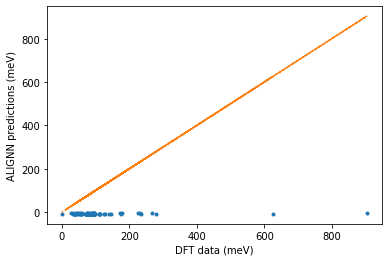

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['target'],df['prediction'],'.')
plt.plot(df['target'],df['target'],'-.')
plt.xlabel('DFT data (meV)')
plt.ylabel('ALIGNN predictions (meV)')

In [ ]:
# from jarvis.db.figshare import data as jdata
# from jarvis.core.atoms import Atoms
# import os

# temp_dir_name = "DataDir_QM9_U0" 
# os.makedirs(temp_dir_name)
# os.chdir(temp_dir_name)

# dft_3d = jdata("qm9_std_jctc") #jdata("dft_3d")
# prop = "U0" #"exfoliation_energy" #"optb88vdw_bandgap"
# f = open("id_prop.csv", "w")
# # count = 0
# for i in dft_3d:
#     atoms = Atoms.from_dict(i["atoms"])
#     jid = i["id"]
#     poscar_name = "POSCAR-" + jid + ".vasp"
#     target = i[prop]
#     if target != "na":
#         atoms.write_poscar(poscar_name)
#         f.write("%s,%6f\n" % (poscar_name, target))
#         # count += 1
#         # if count == max_samples:
#         #     break
# f.close()

# os.chdir(cwd)

In [ ]:
pwd

'/content/alignn/DataDir_QM9_U0'

In [ ]:
!ls

Changing the cut-off in config_example.json as 5,  n_train as 110000, n_val as 10000, n_test as 10829

In [ ]:
# from jarvis.db.jsonutils import loadjson, dumpjson
# config = loadjson("alignn/examples/sample_data/config_example.json")
# config['cutoff'] = 5.0
# config['n_train'] = 110000
# config['n_val'] = 10000
# config['n_test'] = 10829
# dumpjson(data=config, filename="config_qm9.json")

Run for 1000 epochs instead of 5 here to get reasonable performance/MAE

In [ ]:
# import time
# t1=time.time()
# !train_folder.py --root_dir "DataDir_QM9_U0" --epochs 5 --batch_size 64 --config "config_qm9.json" --output_dir="DataDir_QM9U0out"
# t2=time.time()
# print ('Time in s',t2-t1)

In [ ]:
!pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
alignn==2022.9.22
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.7
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0